In [2]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import cv2
import numpy as np
import matplotlib.pyplot as plt

batch_size=128
num_classes=10
epochs=3

(x_train,y_train),(x_test,y_test)=mnist.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
img_x=x_train[0].shape[0]
img_y=x_train[0].shape[1]

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)

model=keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))

model.add(layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,kernel_size=(2,2),strides=(1,1),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#layers.Flatten() make 4D tensordata into 1D tensordata
model.add(layers.Flatten())
model.add(layers.Dense(25*64, activation='relu'))
model.add(layers.Dense(num_classes,activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
#show the structure of nural net
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [4]:
#save model ,only contain the structure of the graph,
model.save('D:\mydoc\ML\model_graph.h5')

In [6]:
#train model
ht=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

#evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/3
469/469 [==============================] - 23s 49ms/step - loss: 0.7839 - accuracy: 0.9226 - val_loss: 0.0675 - val_accuracy: 0.9792
Epoch 2/3
469/469 [==============================] - 23s 49ms/step - loss: 0.0623 - accuracy: 0.9807 - val_loss: 0.0568 - val_accuracy: 0.9827
Epoch 3/3
469/469 [==============================] - 23s 49ms/step - loss: 0.0421 - accuracy: 0.9863 - val_loss: 0.0429 - val_accuracy: 0.9859
Test loss: 0.04293736815452576
Test accuracy: 0.9858999848365784


In [6]:
#save model,contain the graph structure and the weights
model.save('D:\mydoc\ML\model_all.h5')

In [8]:
#save model,only contain the weights
model.save_weights('D:\mydoc\ML\model_weights.h5')

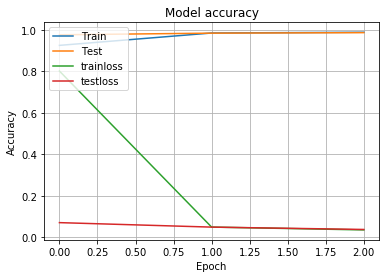

In [9]:

# draw accuracy the process of train  and test 
plt.plot(ht.history['accuracy'])
plt.plot(ht.history['val_accuracy'])
plt.plot(ht.history['loss'])
plt.plot(ht.history['val_loss'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test','trainloss','testloss'], loc='upper left')
plt.grid(True)
plt.show()


In [9]:
#predict
classes = model.predict(x_test, batch_size=128)

In [12]:
#多行注释和取消  ctrl+/
for i in range(10):
    cv2.imshow('ho',x_test[i][:,:])
    print('label:',np.argmax(np.array(y_test[i])),end='   ')
    print('predict:',np.argmax(classes[i]))
    cv2.waitKey(0) 

cv2.destroyAllWindows()

label: 7   predict: 7
label: 2   predict: 2
label: 1   predict: 1
label: 0   predict: 0
label: 4   predict: 4
label: 1   predict: 1
label: 4   predict: 4
label: 9   predict: 9
label: 5   predict: 5
label: 9   predict: 9


测试加载已经训练好的模型做分类

In [14]:
model = keras.models.load_model('D:\mydoc\ML\model_all.h5')

In [15]:
for i in range(10,20):
    cv2.imshow('ho',x_test[i][:,:])
    print('label:',np.argmax(np.array(y_test[i])),end='   ')
    print('predict:',np.argmax(classes[i]))
    cv2.waitKey(0) 

label: 0   predict: 0
label: 6   predict: 6
label: 9   predict: 9
label: 0   predict: 0
label: 1   predict: 1
label: 5   predict: 5
label: 9   predict: 9
label: 7   predict: 7
label: 3   predict: 3
label: 4   predict: 4


模型可视化

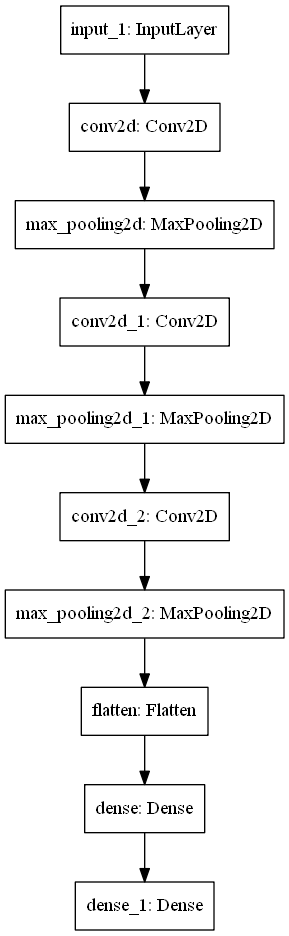

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')